In [1]:
%%capture
!pip3 install pandas


In [2]:
import pandas as pd


json_file_path = 'data/pii-detection-removal-from-educational-data/train.json'
train_df = pd.read_json(json_file_path)

train_df.head()

,document,full_text,tokens,trailing_whitespace,labels
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-..."
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O..."
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O..."
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT..."
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST..."


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
dtypes: int64(1), object(4)
memory usage: 319.1+ KB


In [6]:
len(train_df.labels[0]), len(train_df.labels[1])

(753, 563)

In [7]:
len(train_df.tokens[0]), len(train_df.tokens[1])

(753, 563)

In [8]:
train_df.shape

(6807, 5)

In [9]:
train_df.labels.value_counts()

labels
[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...]                                                          20
[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...]                                                          19
[O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, O,

In [10]:
df_exploded = train_df.explode('labels')


In [11]:
# Count the occurrences of each unique string
label_counts = df_exploded['labels'].value_counts()

# Display the counts
print(label_counts)

labels
O                   4989794
B-NAME_STUDENT         1365
I-NAME_STUDENT         1096
B-URL_PERSONAL          110
B-ID_NUM                 78
B-EMAIL                  39
I-STREET_ADDRESS         20
I-PHONE_NUM              15
B-USERNAME                6
B-PHONE_NUM               6
B-STREET_ADDRESS          2
I-URL_PERSONAL            1
I-ID_NUM                  1
Name: count, dtype: int64


In [12]:
len(label_counts)

13

In [15]:
label_counts.index.tolist()

['O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-USERNAME',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'I-URL_PERSONAL',
 'I-ID_NUM']

In [16]:
%%capture
%pip install matplotlib

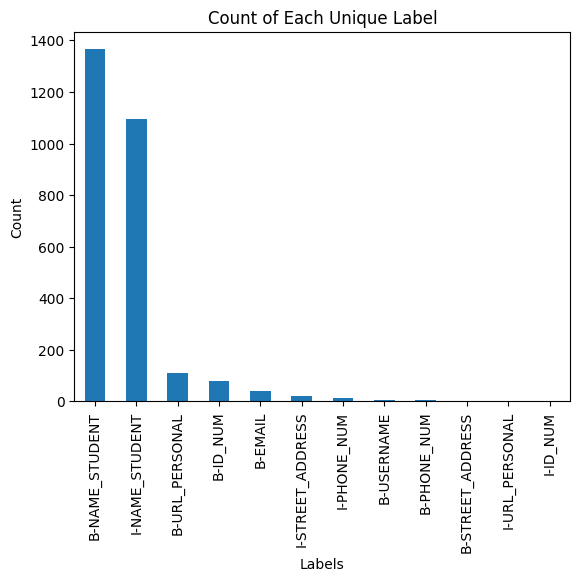

In [18]:
import matplotlib.pyplot as plt

# label_counts.plot(kind='bar')
# plot the counts for the labels excluding'O'
_label_counts = label_counts.tail(-1)
_label_counts.plot(kind='bar')

# set plot labels and title
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Count of Each Unique Label')

# display the plot
plt.show()


In [19]:
train_df.full_text[0]

"Design Thinking for innovation reflexion-Avril 2021-Nathalie Sylla\n\nChallenge & selection\n\nThe tool I use to help all stakeholders finding their way through the complexity of a project is the  mind map.\n\nWhat exactly is a mind map? According to the definition of Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. Paris: Les Éditions d'Organisation.), the mind map (or heuristic diagram) is a graphic  representation technique that follows the natural functioning of the mind and allows the brain's  potential to be released. Cf Annex1\n\nThis tool has many advantages:\n\n•  It is accessible to all and does not require significant material investment and can be done  quickly\n\n•  It is scalable\n\n•  It allows categorization and linking of information\n\n•  It can be applied to any type of situation: notetaking, problem solving, analysis, creation of  new ideas\n\n•  It is suitable for all people and is easy to learn\n\n•  It is fun and encourages exchanges\n\n•  It makes visi

In [357]:
train_df.labels[0]

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O'

In [56]:
# inspect the labels and tokens 
row = 0
tokens = train_df['tokens'][row]
labels = train_df['labels'][row]
df0 = pd.DataFrame({'tokens': tokens, 'labels': labels})
df0[:15].T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
tokens,Design,Thinking,for,innovation,reflexion,-,Avril,2021,-,Nathalie,Sylla,\n\n,Challenge,&,selection
labels,O,O,O,O,O,O,O,O,O,B-NAME_STUDENT,I-NAME_STUDENT,O,O,O,O


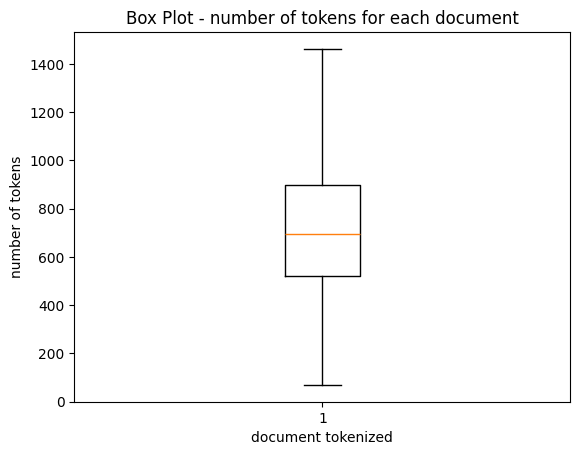

In [63]:
# how long are the texts /tokens
train_df['num_tokens'] = train_df['tokens'].apply(len)

# Plot the box plot of list lengths
plt.boxplot(train_df['num_tokens'], showfliers=False)

# Set plot labels and title
plt.xlabel('document tokenized')
plt.ylabel('number of tokens')
plt.title('Box Plot - number of tokens for each document')
plt.show()

In [66]:
# Count rows with token list length in the top quartile
count_long_text = train_df[train_df['tokens'].apply(len) > 897].shape[0]
len(train_df), count_long_text

(6807, 1696)

In [67]:
# how many outliers?
count_long_text = train_df[train_df['tokens'].apply(len) > 1400].shape[0]
len(train_df), count_long_text

# few outliers -> truncating the text will not influence results much
# an idea would be to split long documents into shorter documents and treat these as independed docs ?

(6807, 238)

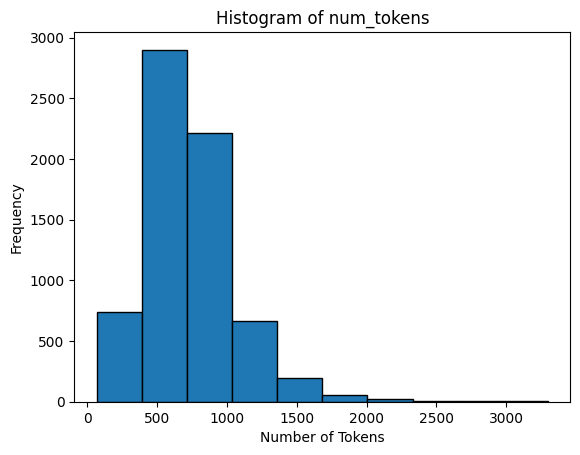

In [61]:
import matplotlib.pyplot as plt

# Plot a histogram for the 'num_tokens' column
plt.hist(train_df['num_tokens'], bins=10, edgecolor='black')
plt.title('Histogram of num_tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()

# distribution of number of tokens is mildly left skewed 
# this means most texts are short (below 1000 tokens)
# thus truncating the longer text will not result in that much information loss 
# (? still the dataset is small so idelaly we want to use all the info we have - split the long texts into shorter independent texts?)

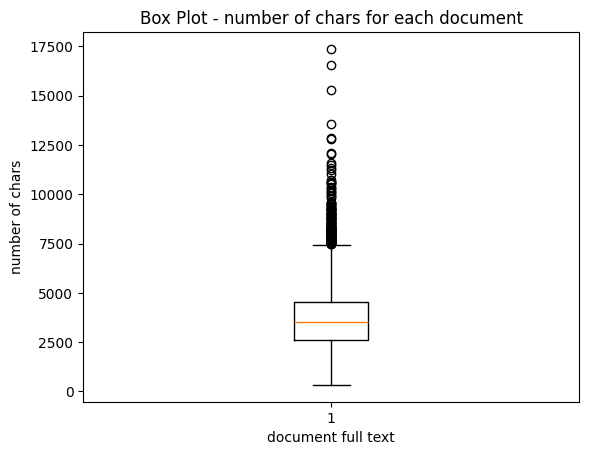

In [70]:
# how long are the texts /tokens
train_df['num_characters'] = train_df['full_text'].apply(len)

# Plot the box plot of list lengths
plt.boxplot(train_df['num_characters'], showfliers=True)

# Set plot labels and title
plt.xlabel('document full text')
plt.ylabel('number of chars')
plt.title('Box Plot - number of chars for each document')
plt.show()

Inspect how the labels (expet 'o' and names) appear in the texts


In [132]:
labels_list = label_counts.index.tolist()
labels_list

['O',
 'B-NAME_STUDENT',
 'I-NAME_STUDENT',
 'B-URL_PERSONAL',
 'B-ID_NUM',
 'B-EMAIL',
 'I-STREET_ADDRESS',
 'I-PHONE_NUM',
 'B-USERNAME',
 'B-PHONE_NUM',
 'B-STREET_ADDRESS',
 'I-URL_PERSONAL',
 'I-ID_NUM']

In [218]:
import random

# dysplay the tokens for a random row
def show_labeled_tokens(df, label):
    # get the rows that have text containing personal urls
    filtered_rows = df[df.apply(lambda row: label in row['labels'], axis=1)]
    idx_list = filtered_rows.index  
    print(f'{len(idx_list)} texts contain {label} labeled tokens\n')
    # get a random index from the list
    idx = random.choice(idx_list)
    target_list = df.loc[idx, 'labels']

    # Get the index location of the label in the list - the begining of an address
    index_location = target_list.index(label)
    print(f'{label} starts at index: {index_location}\n')
    finish = index_location + 30
    print(f'TOKENS: {filtered_rows.tokens[idx][index_location:finish]}\n\n')
    print('TEXT:\n', ' '.join(filtered_rows.tokens[idx][index_location:finish]))
    
    

In [219]:
show_labeled_tokens(train_df,'B-URL_PERSONAL')

72 texts contain B-URL_PERSONAL labeled tokens

B-URL_PERSONAL starts at index: 444

TOKENS: ['https://ingram-castro.com/tagsmain.html', '\n\n', 'Insight', '\n\n', 'By', 'applying', 'mind', 'map', ',', 'my', 'team', 'was', 'able', 'to', 'iden', '<', 'fy', 'opportuni', '<', 'es', ',', 'ideas', ',', 'and', 'connec', '<', 'ons', '.', 'We', 'could']


TEXT:
 https://ingram-castro.com/tagsmain.html 

 Insight 

 By applying mind map , my team was able to iden < fy opportuni < es , ideas , and connec < ons . We could


In [220]:
show_labeled_tokens(train_df, 'B-ID_NUM')

33 texts contain B-ID_NUM labeled tokens

B-ID_NUM starts at index: 12

TOKENS: ['276795361801', '\n\n', 'Customer', 'Segments', 'Unfair', 'advantage', '\n\n', '•', 'Search', 'Engine', ' ', 'Optimization', '\n\n', '•', 'Social', 'Media', 'Marketing', '\n\n', '•', 'Influencer', 'marketing', '\n\n', '•', 'Mobile', 'booths', '\n\n', '•', 'Billboards', '\n\n', '#']


TEXT:
 276795361801 

 Customer Segments Unfair advantage 

 • Search Engine   Optimization 

 • Social Media Marketing 

 • Influencer marketing 

 • Mobile booths 

 • Billboards 

 #


In [369]:
df.labels

0       [O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...
1       [B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...
2       [O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...
3       [O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...
4       [O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...
                              ...                        
6802    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
6803    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
6804    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
6805    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
6806    [O, O, O, O, O, O, O, O, O, O, O, O, O, O, O, ...
Name: labels, Length: 6807, dtype: object

In [370]:
df.head()

,document,full_text,tokens,trailing_whitespace,labels,num_tokens,num_characters
0,7,Design Thinking for innovation reflexion-Avril...,"[Design, Thinking, for, innovation, reflexion,...","[True, True, True, True, False, False, True, F...","[O, O, O, O, O, O, O, O, O, B-NAME_STUDENT, I-...",753,3709
1,10,Diego Estrada\n\nDesign Thinking Assignment\n\...,"[Diego, Estrada, \n\n, Design, Thinking, Assig...","[True, False, False, True, True, False, False,...","[B-NAME_STUDENT, I-NAME_STUDENT, O, O, O, O, O...",563,2915
2,16,Reporting process\n\nby Gilberto Gamboa\n\nCha...,"[Reporting, process, \n\n, by, Gilberto, Gambo...","[True, False, False, True, True, False, False,...","[O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT, O...",729,3792
3,20,Design Thinking for Innovation\n\nSindy Samaca...,"[Design, Thinking, for, Innovation, \n\n, Sind...","[True, True, True, False, False, True, False, ...","[O, O, O, O, O, B-NAME_STUDENT, I-NAME_STUDENT...",1071,5158
4,56,Assignment: Visualization Reflection Submitt...,"[Assignment, :, , Visualization, , Reflecti...","[False, False, False, False, False, False, Fal...","[O, O, O, O, O, O, O, O, O, O, O, O, B-NAME_ST...",1927,5741


In [371]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6807 entries, 0 to 6806
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   document             6807 non-null   int64 
 1   full_text            6807 non-null   object
 2   tokens               6807 non-null   object
 3   trailing_whitespace  6807 non-null   object
 4   labels               6807 non-null   object
 5   num_tokens           6807 non-null   int64 
 6   num_characters       6807 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 683.5+ KB


In [372]:
%%capture
%pip install datasets

In [373]:
from tqdm import tqdm
from datasets import load_dataset

In [374]:
# chack datasets was installed correctly:
# output: {'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?', 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}
# note : the output will vary depending on the time the code is run and the updates in the dataset 'squad'
!python3 -c "from datasets import load_dataset; print(load_dataset('squad', split='train')[0])"

{'id': '5733be284776f41900661182', 'title': 'University_of_Notre_Dame', 'context': 'Architecturally, the school has a Catholic character. Atop the Main Building\'s gold dome is a golden statue of the Virgin Mary. Immediately in front of the Main Building and facing it, is a copper statue of Christ with arms upraised with the legend "Venite Ad Me Omnes". Next to the Main Building is the Basilica of the Sacred Heart. Immediately behind the basilica is the Grotto, a Marian place of prayer and reflection. It is a replica of the grotto at Lourdes, France where the Virgin Mary reputedly appeared to Saint Bernadette Soubirous in 1858. At the end of the main drive (and in a direct line that connects through 3 statues and the Gold Dome), is a simple, modern stone statue of Mary.', 'question': 'To whom did the Virgin Mary allegedly appear in 1858 in Lourdes France?', 'answers': {'text': ['Saint Bernadette Soubirous'], 'answer_start': [515]}}


In [375]:
json_file_path = 'data/pii-detection-removal-from-educational-data/train.json'
train_data = load_dataset('json', data_files=json_file_path, split='train')
train_data

Dataset({
    features: ['tokens', 'trailing_whitespace', 'document', 'full_text', 'labels'],
    num_rows: 6807
})

In [376]:
train_data[0]

{'tokens': ['Design', 'Thinking', 'for', 'innovation', 'reflexion', '-', 'Avril', '2021', '-', 'Nathalie', 'Sylla', '\n\n', 'Challenge', '&', 'selection', '\n\n', 'The', 'tool', 'I', 'use', 'to', 'help', 'all', 'stakeholders', 'finding', 'their', 'way', 'through', 'the', 'complexity', 'of', 'a', 'project', 'is', 'the', ' ', 'mind', 'map', '.', '\n\n', 'What', 'exactly', 'is', 'a', 'mind', 'map', '?', 'According', 'to', 'the', 'definition', 'of', 'Buzan', 'T.', 'and', 'Buzan', 'B.', '(', '1999', ',', 'Dessine', '-', 'moi', ' ', "l'intelligence", '.', 'Paris', ':', 'Les', 'Éditions', "d'Organisation", '.', ')', ',', 'the', 'mind', 'map', '(', 'or', 'heuristic', 'diagram', ')', 'is', 'a', 'graphic', ' ', 'representation', 'technique', 'that', 'follows', 'the', 'natural', 'functioning', 'of', 'the', 'mind', 'and', 'allows', 'the', 'brain', "'s", ' ', 'potential', 'to', 'be', 'released', '.', 'Cf', 'Annex1', '\n\n', 'This', 'tool', 'has', 'many', 'advantages', ':', '\n\n', '•', ' ', 'It', '

In [377]:
train_data['tokens'][0]

['Design', 'Thinking', 'for', 'innovation', 'reflexion', '-', 'Avril', '2021', '-', 'Nathalie', 'Sylla', '\n\n', 'Challenge', '&', 'selection', '\n\n', 'The', 'tool', 'I', 'use', 'to', 'help', 'all', 'stakeholders', 'finding', 'their', 'way', 'through', 'the', 'complexity', 'of', 'a', 'project', 'is', 'the', ' ', 'mind', 'map', '.', '\n\n', 'What', 'exactly', 'is', 'a', 'mind', 'map', '?', 'According', 'to', 'the', 'definition', 'of', 'Buzan', 'T.', 'and', 'Buzan', 'B.', '(', '1999', ',', 'Dessine', '-', 'moi', ' ', "l'intelligence", '.', 'Paris', ':', 'Les', 'Éditions', "d'Organisation", '.', ')', ',', 'the', 'mind', 'map', '(', 'or', 'heuristic', 'diagram', ')', 'is', 'a', 'graphic', ' ', 'representation', 'technique', 'that', 'follows', 'the', 'natural', 'functioning', 'of', 'the', 'mind', 'and', 'allows', 'the', 'brain', "'s", ' ', 'potential', 'to', 'be', 'released', '.', 'Cf', 'Annex1', '\n\n', 'This', 'tool', 'has', 'many', 'advantages', ':', '\n\n', '•', ' ', 'It', 'is', 'acces

https://huggingface.co/docs/datasets/en/access

indexing order matters, especially when working with large audio and image datasets. Indexing by the column name returns all the values in the column first, then loads the value at that position. For large datasets, it may be slower to index by the column name first.

In [378]:
import time

start_time = time.time()
text = train_data[0]["full_text"]
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

start_time = time.time()
text = train_data["full_text"][0]
end_time = time.time()
print(f"Elapsed time: {end_time - start_time:.4f} seconds")

Elapsed time: 0.0011 seconds
Elapsed time: 0.0187 seconds


In [379]:
train_data

Dataset({
    features: ['tokens', 'trailing_whitespace', 'document', 'full_text', 'labels'],
    num_rows: 6807
})

In [380]:
from pprint import pprint

pprint(train_data.info)

DatasetInfo(description='',
            citation='',
            homepage='',
            license='',
            features={'document': Value(dtype='int64', id=None),
                      'full_text': Value(dtype='string', id=None),
                      'labels': Sequence(feature=Value(dtype='string', id=None),
                                         length=-1,
                                         id=None),
                      'tokens': Sequence(feature=Value(dtype='string', id=None),
                                         length=-1,
                                         id=None),
                      'trailing_whitespace': Sequence(feature=Value(dtype='bool',
                                                                    id=None),
                                                      length=-1,
                                                      id=None)},
            post_processed=None,
            supervised_keys=None,
            task_templates=None,
        

In [381]:
pprint(train_data.features)

{'document': Value(dtype='int64', id=None),
 'full_text': Value(dtype='string', id=None),
 'labels': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'tokens': Sequence(feature=Value(dtype='string', id=None), length=-1, id=None),
 'trailing_whitespace': Sequence(feature=Value(dtype='bool', id=None),
                                 length=-1,
                                 id=None)}


In [382]:
train_data.num_rows

6807

In [383]:
# Get the features and their counts
features = train_data.features
num_rows = train_data.num_rows

# Convert Features object to a list of strings
feature_names = [str(feature) for feature in features]

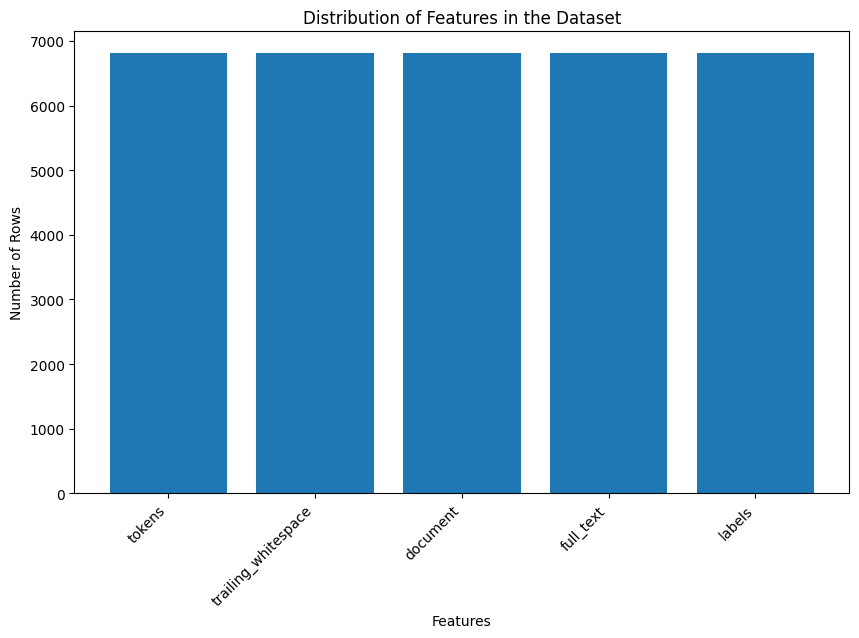

In [384]:
# Plotting
plt.figure(figsize=(10, 6))
plt.bar(feature_names, num_rows)
plt.xlabel('Features')
plt.ylabel('Number of Rows')
plt.title('Distribution of Features in the Dataset')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [385]:
element = train_data[0]
for key, value in element.items():
    print(f"{key}: {value}")


tokens: ['Design', 'Thinking', 'for', 'innovation', 'reflexion', '-', 'Avril', '2021', '-', 'Nathalie', 'Sylla', '\n\n', 'Challenge', '&', 'selection', '\n\n', 'The', 'tool', 'I', 'use', 'to', 'help', 'all', 'stakeholders', 'finding', 'their', 'way', 'through', 'the', 'complexity', 'of', 'a', 'project', 'is', 'the', ' ', 'mind', 'map', '.', '\n\n', 'What', 'exactly', 'is', 'a', 'mind', 'map', '?', 'According', 'to', 'the', 'definition', 'of', 'Buzan', 'T.', 'and', 'Buzan', 'B.', '(', '1999', ',', 'Dessine', '-', 'moi', ' ', "l'intelligence", '.', 'Paris', ':', 'Les', 'Éditions', "d'Organisation", '.', ')', ',', 'the', 'mind', 'map', '(', 'or', 'heuristic', 'diagram', ')', 'is', 'a', 'graphic', ' ', 'representation', 'technique', 'that', 'follows', 'the', 'natural', 'functioning', 'of', 'the', 'mind', 'and', 'allows', 'the', 'brain', "'s", ' ', 'potential', 'to', 'be', 'released', '.', 'Cf', 'Annex1', '\n\n', 'This', 'tool', 'has', 'many', 'advantages', ':', '\n\n', '•', ' ', 'It', 'is'

In [386]:
for key, value in train_data.features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
trailing_whitespace: Sequence(feature=Value(dtype='bool', id=None), length=-1, id=None)
document: Value(dtype='int64', id=None)
full_text: Value(dtype='string', id=None)
labels: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)


In [387]:
pprint(train_data[0])

{'document': 7,
 'full_text': 'Design Thinking for innovation reflexion-Avril 2021-Nathalie '
              'Sylla\n'
              '\n'
              'Challenge & selection\n'
              '\n'
              'The tool I use to help all stakeholders finding their way '
              'through the complexity of a project is the  mind map.\n'
              '\n'
              'What exactly is a mind map? According to the definition of '
              "Buzan T. and Buzan B. (1999, Dessine-moi  l'intelligence. "
              "Paris: Les Éditions d'Organisation.), the mind map (or "
              'heuristic diagram) is a graphic  representation technique that '
              'follows the natural functioning of the mind and allows the '
              "brain's  potential to be released. Cf Annex1\n"
              '\n'
              'This tool has many advantages:\n'
              '\n'
              '•  It is accessible to all and does not require significant '
              'material investme

In [388]:
example = train_data[0]
pd.DataFrame([example["tokens"][:20], example["labels"][:20]],  # only visualise the 20 first tokens
['Tokens', 'Labels'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Tokens,Design,Thinking,for,innovation,reflexion,-,Avril,2021,-,Nathalie,Sylla,\n\n,Challenge,&,selection,\n\n,The,tool,I,use
Labels,O,O,O,O,O,O,O,O,O,B-NAME_STUDENT,I-NAME_STUDENT,O,O,O,O,O,O,O,O,O


In [389]:
from collections import defaultdict
from collections import Counter

split2freqs = defaultdict(Counter)

for row in train_data["labels"]:
    for tag in row:
        if tag.startswith("B"):
            tag_type = tag.split("-")[1]
            split2freqs[tag_type] += Counter([tag])
pd.DataFrame.from_dict(split2freqs, orient="index")

,B-NAME_STUDENT,B-URL_PERSONAL,B-EMAIL,B-ID_NUM,B-USERNAME,B-PHONE_NUM,B-STREET_ADDRESS
NAME_STUDENT,1365.0,NaN,NaN,NaN,NaN,NaN,NaN
URL_PERSONAL,NaN,110.0,NaN,NaN,NaN,NaN,NaN
EMAIL,NaN,NaN,39.0,NaN,NaN,NaN,NaN
ID_NUM,NaN,NaN,NaN,78.0,NaN,NaN,NaN
USERNAME,NaN,NaN,NaN,NaN,6.0,NaN,NaN
PHONE_NUM,NaN,NaN,NaN,NaN,NaN,6.0,NaN
STREET_ADDRESS,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [390]:
from collections import defaultdict, Counter
import pandas as pd

split2freqs = defaultdict(Counter)


for row in train_data["labels"]:
    for tag in row:
        if tag.startswith("B"):
            tag_type = tag.split("-")[1]
            split2freqs[tag_type] += Counter([tag])


pprint(split2freqs)

frequnecy = [i for i in split2freqs[tag_type].values()]
print('\n\nexample of tag value (last one displayed)', tag_type, frequnecy, '\n\n')

for tag_type in split2freqs:
    frequnecy = [i for i in split2freqs[tag_type].values()][0]
    print(tag_type, frequnecy)


defaultdict(<class 'collections.Counter'>,
            {'EMAIL': Counter({'B-EMAIL': 39}),
             'ID_NUM': Counter({'B-ID_NUM': 78}),
             'NAME_STUDENT': Counter({'B-NAME_STUDENT': 1365}),
             'PHONE_NUM': Counter({'B-PHONE_NUM': 6}),
             'STREET_ADDRESS': Counter({'B-STREET_ADDRESS': 2}),
             'URL_PERSONAL': Counter({'B-URL_PERSONAL': 110}),
             'USERNAME': Counter({'B-USERNAME': 6})})


example of tag value (last one displayed) ID_NUM [78] 


NAME_STUDENT 1365
URL_PERSONAL 110
EMAIL 39
ID_NUM 78
USERNAME 6
PHONE_NUM 6
STREET_ADDRESS 2


In [391]:
pd.DataFrame({tag_type: [list(split2freqs[tag_type].values())[0]] for tag_type in split2freqs}, index=['train'])

,NAME_STUDENT,URL_PERSONAL,EMAIL,ID_NUM,USERNAME,PHONE_NUM,STREET_ADDRESS
train,1365,110,39,78,6,6,2


In [392]:
train_data

Dataset({
    features: ['tokens', 'trailing_whitespace', 'document', 'full_text', 'labels'],
    num_rows: 6807
})

In [400]:
tags = train_data.features["labels"].feature
print(tags)

Value(dtype='string', id=None)


In [414]:
list(label_counts.keys())

['O', 'B-NAME_STUDENT', 'I-NAME_STUDENT', 'B-URL_PERSONAL', 'B-ID_NUM', 'B-EMAIL', 'I-STREET_ADDRESS', 'I-PHONE_NUM', 'B-USERNAME', 'B-PHONE_NUM', 'B-STREET_ADDRESS', 'I-URL_PERSONAL', 'I-ID_NUM']

In [416]:
# Create ClassLabel for 'tags'
train_data = train_data.map(lambda example: {'tags': ClassLabel(names=list(label_counts.keys()))(example['labels'])}, batched=True)


Map:   0%|          | 0/6807 [00:00<?, ? examples/s]


TypeError: ClassLabel.__call__() takes 1 positional argument but 2 were given

In [423]:
from datasets import ClassLabel, Sequence

# dataset = dataset.map(lambda ex: {"labels": ex["labels"].split(",")})

def get_label_list(labels):
    # copied from https://github.com/huggingface/transformers/blob/66fd3a8d626a32989f4569260db32785c6cbf42a/examples/pytorch/token-classification/run_ner.py#L320
    unique_labels = set()
    for label in labels:
        unique_labels = unique_labels | set(label)
    label_list = list(unique_labels)
    label_list.sort()
    return label_list

all_labels = get_label_list(dataset["labels"])
print(all_labels)

dataset = dataset.cast_column("labels", Sequence(ClassLabel(names=all_labels)))
dataset
# dataset = dataset.train_test_split(test_size=0.1)

['B-EMAIL', 'B-ID_NUM', 'B-NAME_STUDENT', 'B-PHONE_NUM', 'B-STREET_ADDRESS', 'B-URL_PERSONAL', 'B-USERNAME', 'I-ID_NUM', 'I-NAME_STUDENT', 'I-PHONE_NUM', 'I-STREET_ADDRESS', 'I-URL_PERSONAL', 'O']


Casting the dataset: 100%|██████████| 6807/6807 [00:15<00:00, 452.14 examples/s]


Dataset({
    features: ['tokens', 'trailing_whitespace', 'document', 'full_text', 'labels'],
    num_rows: 6807
})

In [402]:
def create_tag_names(batch):
    return {"ner_tags_str": [tags[idx] for idx in batch["labels"]]}

dataset = train_data.map(create_tag_names)

Map:   0%|          | 0/6807 [00:00<?, ? examples/s]


TypeError: 'Value' object is not subscriptable

In [393]:
# from datasets import ClassLabel

# # Update the features dictionary
# train_data.info.features['labels'].feature = ClassLabel(
#     num_classes=len(label_counts),
#     names=label_counts.index.tolist(),
#     names_file=None,
#     id=None
# )

# train_data

In [425]:
for key, value in dataset.features.items():
    print(f"{key}: {value}")

tokens: Sequence(feature=Value(dtype='string', id=None), length=-1, id=None)
trailing_whitespace: Sequence(feature=Value(dtype='bool', id=None), length=-1, id=None)
document: Value(dtype='int64', id=None)
full_text: Value(dtype='string', id=None)
labels: Sequence(feature=ClassLabel(names=['B-EMAIL', 'B-ID_NUM', 'B-NAME_STUDENT', 'B-PHONE_NUM', 'B-STREET_ADDRESS', 'B-URL_PERSONAL', 'B-USERNAME', 'I-ID_NUM', 'I-NAME_STUDENT', 'I-PHONE_NUM', 'I-STREET_ADDRESS', 'I-URL_PERSONAL', 'O'], id=None), length=-1, id=None)


In [404]:
train_data

Dataset({
    features: ['tokens', 'trailing_whitespace', 'document', 'full_text', 'labels'],
    num_rows: 6807
})

In [398]:
from datasets import Dataset, ClassLabel

label_column_name = "labels"


# Convert the Sequence labels to ClassLabel
class_labels = ClassLabel(names=train_data[label_column_name])
train_data = train_data.cast({label_column_name: class_labels})

train_data


ValueError: Some label names are duplicated. Each label name should be unique.

In [399]:
dataset = train_data.class_encode_column("labels")

ValueError: Class encoding is only supported for Value column, and column labels is Sequence.

In [395]:
# split the data into train and validation sets - 20% for test set
# column we want to stratify with respect to

dataset = train_data.train_test_split(test_size=0.2, shuffle=True, stratify_by_column="labels")
dataset

ValueError: Stratifying by column is only supported for ClassLabel column, and column labels is Sequence.

In [ ]:
dataset.shape

{'train': (5445, 5), 'test': (1362, 5)}

In [ ]:
from collections import defaultdict
from collections import Counter

split2freqs = defaultdict(Counter)
for split, data in dataset.items():
    for row in data["labels"]:
        for tag in row:
            if tag.startswith("B"):
                tag_type = tag.split("-")[1]
                split2freqs[split][tag_type] += 1
pd.DataFrame.from_dict(split2freqs, orient="index")

,NAME_STUDENT,URL_PERSONAL,EMAIL,USERNAME,ID_NUM,PHONE_NUM,STREET_ADDRESS
train,1088,73,23,6.0,53,3,2.0
test,277,37,16,NaN,25,3,NaN
